In [130]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

df = sns.load_dataset("tips")

### EDA

In [46]:
# Excersise a)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [47]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [48]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
df_describe = df.describe().drop('count')
df_describe

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [50]:
# Excersise b)
df_tot_bill = df["total_bill"].describe().drop("count")
df_tip = df["tip"].describe().drop("count")
size_df = df['size'].describe().drop('count')

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\2603097104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df_describe, x=df_tot_bill.index, y=df_tot_bill.values, palette=palette).set(title="Total_bill")
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\2603097104.py:4: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax=axes[0], data=df_describe, x=df_tot_bill.index, y=df_tot_bill.values, palette=palette).set(title="Total_bill")
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\2603097104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

[Text(0.5, 1.0, 'Size')]

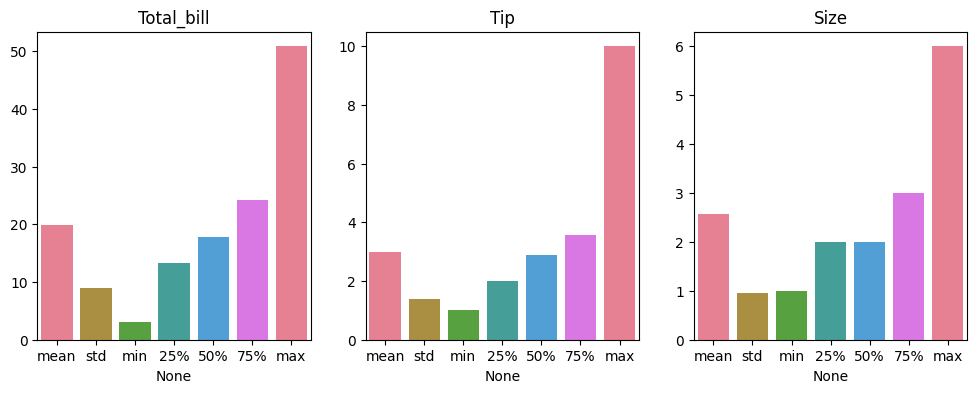

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
palette = sns.color_palette("husl")

sns.barplot(ax=axes[0], data=df_describe, x=df_tot_bill.index, y=df_tot_bill.values, palette=palette).set(title="Total_bill")
sns.barplot(ax=axes[1], data=df_describe,x=df_tip.index, y=df_tip.values, palette=palette).set(title="Tip")
sns.barplot(ax=axes[2], data=df_describe,x=size_df.index, y=size_df.values,palette=palette).set(title="Size")

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\1874502730.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(ax=axes[0], data=df, x="total_bill", y="tip", hue="sex", palette=palette)
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\1874502730.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(ax=axes[1], data=df, x="size", y="tip", hue="day", palette=palette)
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\1874502730.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(ax=axes[2], data=df, x="total_bill", y="tip", hue="smoker", palette=palette)


<Axes: xlabel='total_bill', ylabel='tip'>

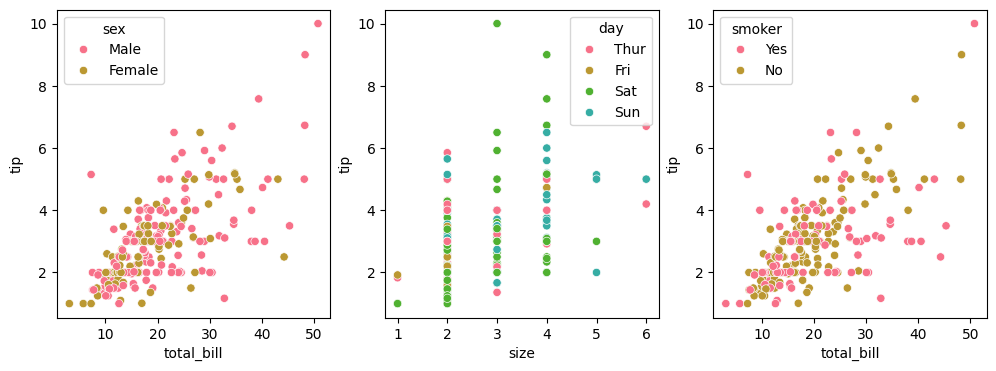

In [80]:
# Excersise c)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

df_sex = df["sex"].describe().drop("count")

sns.scatterplot(ax=axes[0], data=df, x="total_bill", y="tip", hue="sex", palette=palette)
sns.scatterplot(ax=axes[1], data=df, x="size", y="tip", hue="day", palette=palette)
sns.scatterplot(ax=axes[2], data=df, x="total_bill", y="tip", hue="smoker", palette=palette)

In [104]:
df_thursday = df[df['day']=="Thursday"]
df_friday = df[df["day"]=="Friday"]
df_saturday = df[df["day"]=="Saturday"]
df_sunday = df[df["day"]=="Sunday"]

In [105]:
df_male = df[df["sex"]=="Male"]
df_female = df[df["sex"]=="Female"]

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\537703488.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(ax=axes[0], data=df_concatenated, x="sex", y="tip", hue='smoker', palette=palette)
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\537703488.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(ax=axes[1], data=df_concat_2, x="sex", y="tip", hue='smoker', palette=palette)
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\537703488.py:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(ax=axes[2], data=df_concat_3, x="sex", y="tip", hue='smoker', palette=palette)
C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\537703488.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(

<Axes: xlabel='sex', ylabel='tip'>

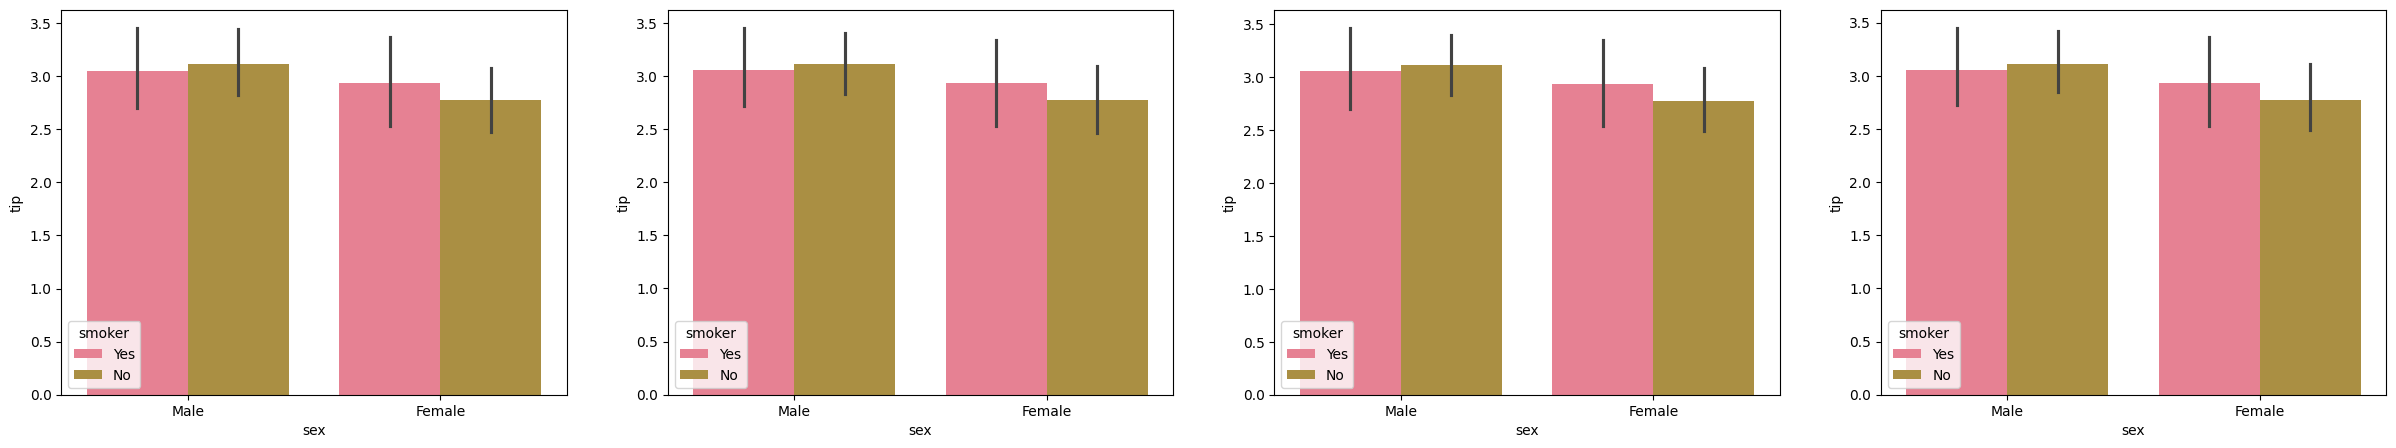

In [106]:
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

df_concatenated = pd.concat([df_male, df_female, df_thursday])
df_concat_2 = pd.concat([df_male, df_female, df_friday])
df_concat_3 = pd.concat([df_male, df_female, df_saturday])
df_concat_3 = pd.concat([df_male, df_female, df_saturday])
df_concat_4 = pd.concat([df_male, df_female, df_sunday])

sns.barplot(ax=axes[0], data=df_concatenated, x="sex", y="tip", hue='smoker', palette=palette)
sns.barplot(ax=axes[1], data=df_concat_2, x="sex", y="tip", hue='smoker', palette=palette)
sns.barplot(ax=axes[2], data=df_concat_3, x="sex", y="tip", hue='smoker', palette=palette)
sns.barplot(ax=axes[3], data=df_concat_4, x="sex", y="tip", hue='smoker', palette=palette)

### Train|test split

In [107]:
X = df[["size", "total_bill"]]
y = df["tip"]

X_train , X_test, Y_train, Y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

### feature standardization

In [110]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

X_train.shape , X_test.shape, Y_train.shape, Y_test.shape

((170, 2), (74, 2), (170,), (74,))

In [117]:
print(f"scaled_X_train (total_bill, size) mean: {scaled_X_train.mean()}")
print(f"scaled_X_test (total_bill, size) mean: {scaled_X_test.mean()}")
print(f"scaled_X_train (total_bill, size) std: {scaled_X_train.std()}")
print(f"scaled_X_test (total_bill, size) std: {scaled_X_test.std()}")

scaled_X_train (total_bill, size) mean: -1.6326809185664067e-17
scaled_X_test (total_bill, size) mean: -0.11842850105809709
scaled_X_train (total_bill, size) std: 1.0
scaled_X_test (total_bill, size) std: 0.9970563805771954


### Polynomial features

In [120]:
poly_f = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_f.fit_transform(scaled_X_train)
X_test_poly = poly_f.transform(scaled_X_test)

X_test_poly_2 = poly_f.fit_transform(X_test_poly)

np.array_equal(X_test_poly, X_test_poly_2)

False

### Polynomial regression

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_16192\1270158604.py:23: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("training loss", "test loss")


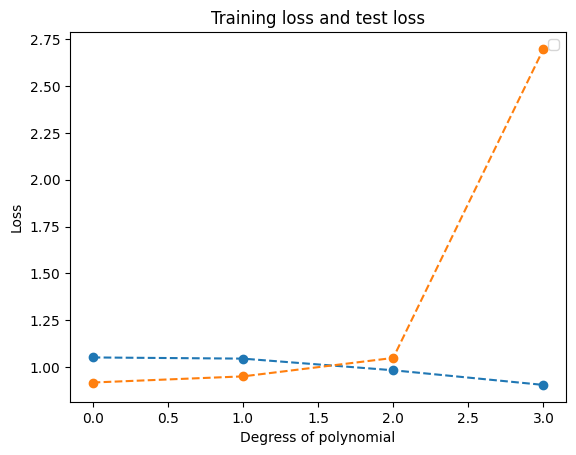

In [123]:
train_rmse = []
test_rmse = []

for i in range(1, 5):
    model_polynomial = PolynomialFeatures(i, include_bias=False)
    X_train_poly = model_polynomial.fit_transform(scaled_X_train)
    X_test_poly = model_polynomial.fit_transform(scaled_X_test)

    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_rmse.append(np.sqrt(mean_squared_error(Y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(Y_test, y_test_pred)))

plt.plot(train_rmse, "--o")
plt.plot(test_rmse, "--o")
plt.title("Training loss and test loss")
plt.xlabel("Degress of polynomial")
plt.ylabel("Loss")
plt.legend("training loss", "test loss")

### Regularization methods

In [127]:
# Excersise a)
model_ridgeCV = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10])
model_ridgeCV.fit(X_train_poly, Y_train)

y_pred = model_ridgeCV.predict(X_test_poly)
   
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Chosen alpha: {model_ridgeCV.alpha_}")
print(f"weights: {model_ridgeCV.coef_}")
print(f"Mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"root mean squared error: {rmse}")

Best alpha: 5.0
weights: [ 0.23803646  0.91433889 -0.01502712  0.20651601 -0.67393371 -0.12391278
 -0.03541485  0.31834213 -0.25974303  0.04977343 -0.12671385  0.24867839
 -0.18093215  0.1589648 ]
Mean absolute error: 0.831477133422882
mean squared error: 2.2195407788475374
root mean squared error: 1.4898123300763548


In [129]:
# Excersise b)
model_lassoCV = LassoCV(eps=0.001, n_alphas= 100, max_iter=10000, cv=5)
model_lassoCV.fit(X_train_poly, Y_train)

y_pred = model_lassoCV.predict(X_test_poly)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Chosen alpha: {model_lassoCV.alpha_}")
print(f"weights: {model_lassoCV.coef_}")
print(f"Mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"root mean squared error: {rmse}")

Best alpha: 0.2101676095425171
weights: [ 0.          0.22948859  0.         -0.         -0.          0.03202145
  0.          0.09664459  0.08795395  0.         -0.          0.
  0.          0.        ]
Mean absolute error: 0.8243843565460008
mean squared error: 1.3486006046130274
root mean squared error: 1.1612926438297229


In [132]:
# Excersise c)
model_ElasticCV = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], eps=0.001, n_alphas= 100, max_iter=10000, cv=5)
model_ElasticCV.fit(X_train_poly, Y_train)

y_pred = model_ElasticCV.predict(X_test_poly)

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Chosen alpha: {model_ElasticCV.alpha_}")
print(f"weights: {model_ElasticCV.coef_}")
print(f"Mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"root mean squared error: {rmse}")

Chosen alpha: 0.10839018107107092
weights: [ 0.09772013  0.5161639   0.          0.         -0.2107294   0.01798884
  0.          0.11353608  0.          0.          0.          0.
  0.          0.03689466]
Mean absolute error: 0.761241747155863
mean squared error: 1.3005916633716819
root mean squared error: 1.1404348571363827
